### **Importing Libraries & Data**

In [5338]:
# Data Analysis 
import pandas as pd
import numpy as np

# Visualization 
import graphviz 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# ML Algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Scores
from sklearn.model_selection import cross_val_score

In [5339]:
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

### **EDA**

In [5340]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5341]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### **Cleaning Train set**

In [5342]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


List Numerical Features

In [5343]:
numerical_features = train_data.select_dtypes(include = [np.number])
numerical_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

List categorical features

In [5344]:
categorical_features = train_data.select_dtypes(include= [object])
categorical_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Missing Values

In [5345]:
nulls = train_data.isnull().sum().to_frame("nulls")
nulls.sort_values("nulls", inplace = True, ascending = False)
nulls

,nulls
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


Percentage

In [5346]:
percentage = train_data.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True, ascending = False)
percentage

,nulls
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


Correlations numerical attributes

<AxesSubplot:>

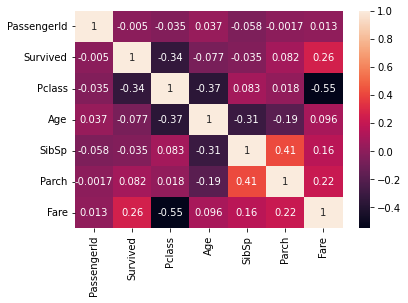

In [5347]:
correlation = numerical_features.corr()
sns.heatmap(correlation, annot = True)

Extracting relevance of names

In [5348]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Replacing most common names for simplicity 

In [5349]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

Describing the mean of name relevance with the percentage of who survided

In [5350]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


Changing name title to integers

In [5351]:
train_data['Title'] = train_data['Title'].map({'Master': 0 ,'Miss': 1, 'Mr': 2 , 'Mrs': 3, 'Other': 4,}).astype(int)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2


In [5352]:
train_data = train_data.drop(['Cabin', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Name', 'PassengerId'], axis = 1)

Changing Sex to dummy variables (binary)

In [5353]:
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_data

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,22.0,S,2
1,1,1,1,38.0,C,3
2,1,3,1,26.0,S,1
3,1,1,1,35.0,S,3
4,0,3,0,35.0,S,2
...,...,...,...,...,...,...
886,0,2,0,27.0,S,4
887,1,1,1,19.0,S,1
888,0,3,1,NaN,S,1
889,1,1,0,26.0,C,2


Replacing missing values of age by the mean value

In [5354]:
train_data['Age'] = train_data['Age'].fillna(29)

Replacing young, mature, and old people with integers for quickly access

In [5355]:
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age']

train_data['Age'] = train_data['Age'].astype(int)

train_data

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1,S,2
1,1,1,1,2,C,3
2,1,3,1,1,S,1
3,1,1,1,2,S,3
4,0,3,0,2,S,2
...,...,...,...,...,...,...
886,0,2,0,1,S,4
887,1,1,1,1,S,1
888,0,3,1,1,S,1
889,1,1,0,1,C,2


A correlation with the ones who survided embarked in different ports

In [5356]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Changing port names to integers

In [5357]:
port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(port)
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1,0,2
1,1,1,1,2,1,3
2,1,3,1,1,0,1
3,1,1,1,2,0,3
4,0,3,0,2,0,2
...,...,...,...,...,...,...
886,0,2,0,1,0,4
887,1,1,1,1,0,1
888,0,3,1,1,0,1
889,1,1,0,1,1,2


#### **Cleaning Test Data For Future Use**

In [5358]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5359]:
t_numerical_features = test_data.select_dtypes(include = [np.number])
t_numerical_features.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5360]:
t_categorical_features = test_data.select_dtypes(include= [object])
t_categorical_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [5361]:
t_nulls = test_data.isnull().sum().to_frame("t_nulls")
t_nulls.sort_values("t_nulls", inplace = True, ascending = False)
t_nulls

,t_nulls
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


In [5362]:
t_percentage = test_data.isnull().mean()*100
t_percentage = t_percentage.to_frame("nulls")
t_percentage.sort_values("nulls", inplace = True, ascending = False)
t_percentage

,nulls
Cabin,78.229665
Age,20.574163
Fare,0.239234
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000


<AxesSubplot:>

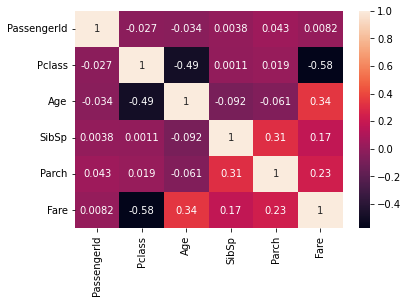

In [5363]:
correlation = t_numerical_features.corr()
sns.heatmap(correlation, annot = True)

In [5364]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(test_data['Title'], test_data['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [5365]:
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [5366]:
test_data['Title'] = test_data['Title'].map({'Master': 0 ,'Miss': 1, 'Mr': 2 , 'Mrs': 3, 'Other': 4,}).astype(int)
test_data = test_data.drop(['Cabin', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Name'], axis = 1)

test_data

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,male,34.5,Q,2
1,893,3,female,47.0,S,3
2,894,2,male,62.0,Q,2
3,895,3,male,27.0,S,2
4,896,3,female,22.0,S,3
...,...,...,...,...,...,...
413,1305,3,male,NaN,S,2
414,1306,1,female,39.0,C,4
415,1307,3,male,38.5,S,2
416,1308,3,male,NaN,S,2


In [5367]:
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,0,34.5,Q,2
1,893,3,1,47.0,S,3
2,894,2,0,62.0,Q,2
3,895,3,0,27.0,S,2
4,896,3,1,22.0,S,3
...,...,...,...,...,...,...
413,1305,3,0,NaN,S,2
414,1306,1,1,39.0,C,4
415,1307,3,0,38.5,S,2
416,1308,3,0,NaN,S,2


In [5368]:
test_data['Age'] = test_data['Age'].fillna(29)

In [5369]:
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age']

test_data['Age'] = test_data['Age'].astype(int)

test_data

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,0,2,Q,2
1,893,3,1,2,S,3
2,894,2,0,3,Q,2
3,895,3,0,1,S,2
4,896,3,1,1,S,3
...,...,...,...,...,...,...
413,1305,3,0,1,S,2
414,1306,1,1,2,C,4
415,1307,3,0,2,S,2
416,1308,3,0,1,S,2


In [5370]:
t_port = test_data.Embarked.dropna().mode()[0]
test_data['Embarked'] = test_data['Embarked'].fillna(t_port)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test_data

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,0,2,2,2
1,893,3,1,2,0,3
2,894,2,0,3,2,2
3,895,3,0,1,0,2
4,896,3,1,1,0,3
...,...,...,...,...,...,...
413,1305,3,0,1,0,2
414,1306,1,1,2,1,4
415,1307,3,0,2,0,2
416,1308,3,0,1,0,2


#### **Revising both datasets**

In [5371]:
train_data

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1,0,2
1,1,1,1,2,1,3
2,1,3,1,1,0,1
3,1,1,1,2,0,3
4,0,3,0,2,0,2
...,...,...,...,...,...,...
886,0,2,0,1,0,4
887,1,1,1,1,0,1
888,0,3,1,1,0,1
889,1,1,0,1,1,2


In [5372]:
test_data

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,0,2,2,2
1,893,3,1,2,0,3
2,894,2,0,3,2,2
3,895,3,0,1,0,2
4,896,3,1,1,0,3
...,...,...,...,...,...,...
413,1305,3,0,1,0,2
414,1306,1,1,2,1,4
415,1307,3,0,2,0,2
416,1308,3,0,1,0,2


### **Applying Models**:

In [5373]:
Y_train = train_data["Survived"]

train_data = train_data.drop('Survived', axis=1)
X_train = train_data

#X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape
#X_test.shape

((891, 5), (891,))

#### **Decision Tree**

In [5374]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 5)
print("Score", acc_decision_tree)

Score 84.28732


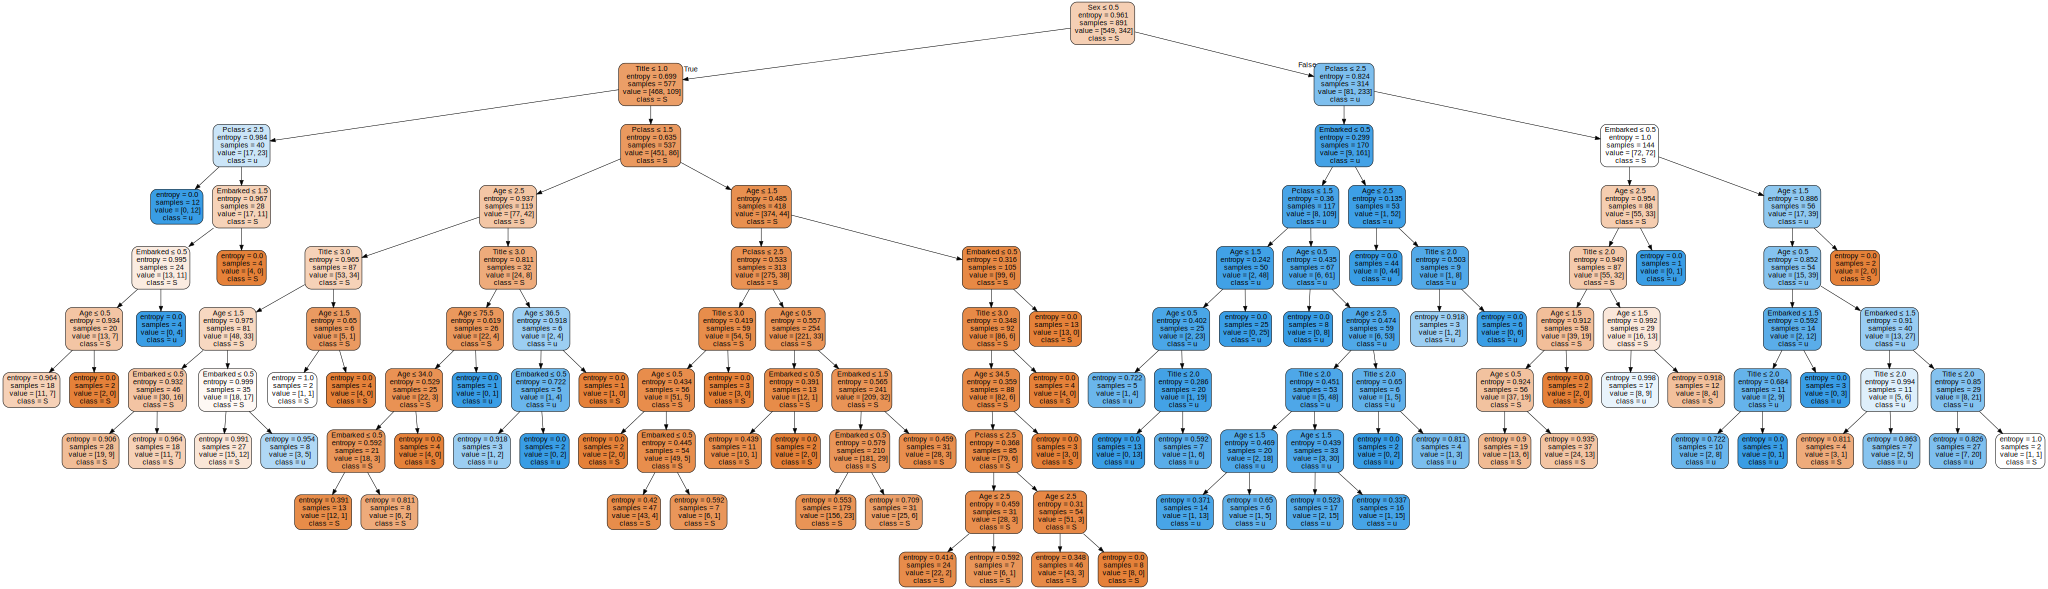

In [5375]:
dot_data = tree.export_graphviz(decision_tree, feature_names=train_data.columns ,
                                class_names= Y_train.name, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("Titanic") 
graph

In [5376]:
dt_cross = cross_val_score(decision_tree, X_train, Y_train, cv = 5) * 100
print("Score", cross)
print("avg", dt_cross.mean())

Score [79.88826816 83.70786517 84.26966292 79.7752809  84.26966292]
avg 82.38214801330739


#### **Random Forest**

In [5377]:
random_forest = RandomForestClassifier(criterion='entropy',n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 5)
print("Score", acc_random_forest)

Score 84.28732


In [5378]:
rf_cross = cross_val_score(random_forest, X_train, Y_train, cv = 5) * 100
print("Score", rf_cross)
print("avg", rf_cross.mean())

Score [82.68156425 83.70786517 84.83146067 78.65168539 84.26966292]
avg 82.82844768062269


#### **Which Algorithm is better, DT or RF? What are your observations from the algorithm comparison analysis?**

##### Comment/Observations:

For this analysis random forest works slightly better than decision tree with a 0.44 difference in average accuracy and 1.0 difference in its score after applying cross validation. 

One observation to take into account is that after apply cross-validation the random forest algorithm gives different outputs while the decision tree remains constant. 

